In [1]:
!pip install face_recognition
import face_recognition
#change runtime to gpu for importing face recognition

     |████████████████████████████████| 100.2MB 104kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=f9be0a6a959ad4f552867ae05383398b516009451c0bba7755af235f1b2cd051
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


# HOG FEATURES

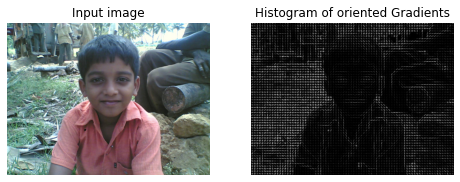

In [2]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

image = cv2.imread('rakshi.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#fd is feature description (used to represent image)
fd, hog_image = hog(image, orientations = 8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)

#plot input and hog image
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4),sharex= True,sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Input image')

#rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of oriented Gradients')
plt.show()



In [3]:
len(fd)

38400

In [4]:
image.shape

(960, 1280, 3)

# FACE DETECTION

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline


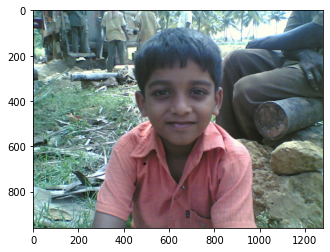

In [6]:
image = cv2.imread('rakshi.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)


In [7]:
#find all faces in the image
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 1 face(s) in input image.


A face is located at pixel location Top: 491, Left: 277, Bottom: 812, Right: 598


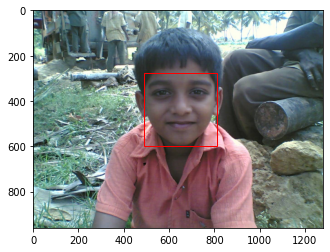

In [8]:
#get axis handle
plt.imshow(image)
ax = plt.gca()

#repeat for all faces found 
for face_location in face_locations:
  #print location of each face in this image
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))

  #lets draw box around face
  rect= Rectangle((x,y), w-x , h-y , fill=False, color='red')
  ax.add_patch(rect)

#show output image
plt.show()

In [9]:
#load known images (create a database)
image = cv2.imread('rakshi.jpg')
rakshi = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('chris.jpg')
chris = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('marvel.jpg')
marvel = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [10]:
#get face encoding of each person.This can fail if no one is found in photo
rakshi_encoding = face_recognition.face_encodings(rakshi)[0]
chris_encoding = face_recognition.face_encodings(chris)[0]
marvel_encoding = face_recognition.face_encodings(marvel)[0]
# create database of all known face encoding
known_face_encodings = [rakshi_encoding,chris_encoding,marvel_encoding]

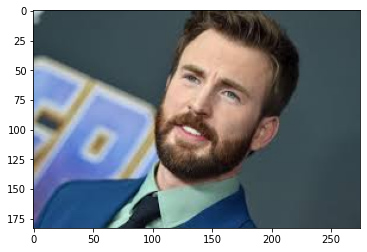

In [19]:
#load image we want to check
image = cv2.imread('chris evans.jpg')
unknown_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
#get face encodings for any people in picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [20]:
from scipy.spatial import distance

#there might be more than one person in photo ; so we need to loop each photo found
for unknown_face_encoding in unknown_face_encodings:

        #compute euclidean distance
        results = []
        for known_face_encoding in known_face_encodings:
          d = distance.euclidean(known_face_encoding,unknown_face_encoding)
          results.append(d)
        threshold = 0.6
        results = np.array(results)<=threshold

        name= "Unknown"

        if results[0]:
           name="rakshi"
        elif results[1]:
           name="chris"
        elif results[2]:
           name="marvel"
        print(f"Found {name} in the photo!")

Found chris in the photo!


# PLAYING WITH FACIAL LANDMARKS

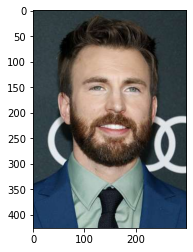

In [34]:
image = cv2.imread('chris.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [35]:
#find all facial features in all faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

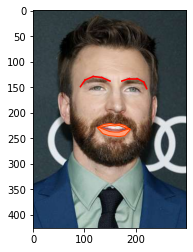

In [36]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:

  #draw line over eyebrows
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x,pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l= mlines.Line2D([pre_x,x], [pre_y,y], color="red")
    ax.add_line(l)
    pre_x,pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
     l = mlines.Line2D([pre_x,x], [pre_y,y],color="red") #,fill = (128,0,128,100),width=3)
     ax.add_line(l)
     pre_x,pre_y = x,y

  p = Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgecolor= 'orangered') #,fill = (128,0,28)
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgecolor= 'orangered') #,fill = (128,0,28)
  ax.add_patch(p)

plt.show()